In [9]:
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
import numpy as np
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import PIL.Image as Image
import json
import pandas as pd
import logging

In [4]:
def data_loader(base_dir):
    images = []
    image_labels = []

    # Loop through each folder in the base directory (each folder corresponds to a label)
    for label in os.listdir(base_dir):
        label_dir = os.path.join(base_dir, label)

        # Check if the current item is a directory
        if os.path.isdir(label_dir):
            # Loop through all images in the folder
            for filename in os.listdir(label_dir):
                image_path = os.path.join(label_dir, filename)
                if filename.endswith('.png') or filename.endswith('.jpg'):
                    # Load the image and resize it to 28x28 (MNIST size)
                    img = Image.open(image_path).convert('L')
                    img_array = np.array(img)  # Convert image to numpy array
                    images.append(img_array)
                    image_labels.append(int(label))  # Use the folder name as the label

    # Convert lists to numpy arrays
    x_data = np.array(images)  # Shape: (num_images, 28, 28)
    y_data = np.array(image_labels)  # Shape: (num_images,)
    
    return x_data, y_data

In [5]:
# prepare data
dir_train_mnist = r'C:\Users\81903\Desktop\coursework\thesis\6. repo\IMGRECO\week3-replicate\report\datasets\mnist\equalized_train_images_labels-m'
dir_test_mnist = r'C:\Users\81903\Desktop\coursework\thesis\6. repo\IMGRECO\week3-replicate\report\datasets\mnist\equalized_test_images_labels-m'

x_train, y_train = data_loader(dir_train_mnist)
x_test, y_test = data_loader(dir_test_mnist)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)




In [7]:
# build the model
model = models.Sequential([
    layers.Conv2D(64, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),

    layers.Dense(10, activation='softmax')  
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Create a log file for recording training results
log_filename = "training_baseline_cnn_mnist.txt"
logging.basicConfig(filename=log_filename, level=logging.INFO, format="%(asctime)s - %(message)s")

# Log the start of the training process
logging.info("***************This is the logging book for MNIST datasets******************")
# train the model

start_time = time.time()

history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"training : {training_time:.2f} seconds")
logging.info(f"training : {training_time:.2f} seconds")

Epoch 1/50


469/469 [==============================] - 40s 80ms/step - loss: 0.4009 - accuracy: 0.8741 - val_loss: 0.1002 - val_accuracy: 0.9693
Epoch 2/50
469/469 [==============================] - 38s 81ms/step - loss: 0.1445 - accuracy: 0.9553 - val_loss: 0.0593 - val_accuracy: 0.9821
Epoch 3/50
469/469 [==============================] - 37s 80ms/step - loss: 0.1061 - accuracy: 0.9674 - val_loss: 0.0502 - val_accuracy: 0.9841
Epoch 4/50
469/469 [==============================] - 37s 79ms/step - loss: 0.0889 - accuracy: 0.9717 - val_loss: 0.0439 - val_accuracy: 0.9859
Epoch 5/50
469/469 [==============================] - 37s 79ms/step - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0373 - val_accuracy: 0.9874
Epoch 6/50
469/469 [==============================] - 37s 79ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.0343 - val_accuracy: 0.9879
Epoch 7/50
469/469 [==============================] - 37s 79ms/step - loss: 0.0629 - accuracy: 0.9803 - val_loss: 0.0330 - val_accurac

In [11]:
# Evaluate the model and measure inference time
start_time = time.time()  # Start time

y_pred = model.predict(x_test)  # Model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

end_time = time.time()  # End time
inference_time = end_time - start_time  # Calculate the time taken for inference

# Print the inference time
print(f"Inference time: {inference_time:.4f} seconds")
logging.info(f"Inference time: {inference_time:.4f} seconds")

# Precision、Recall、F1-score
report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)])
print("\nclassification report:\n", report)
logging.info("\nclassification report:\n", report)
# Accuracy 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAccuracy: {test_acc:.4f}')
logging.info(f'\nAccuracy: {test_acc:.4f}')

313/313 [==============================] - 4s 11ms/step
Inference time: 5.4445 seconds

classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



--- Logging error ---
Traceback (most recent call last):
  File "D:\software\anaconda\Lib\logging\__init__.py", line 1110, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "D:\software\anaconda\Lib\logging\__init__.py", line 953, in format
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "D:\software\anaconda\Lib\logging\__init__.py", line 687, in format
    record.message = record.getMessage()
                     ^^^^^^^^^^^^^^^^^^^
  File "D:\software\anaconda\Lib\logging\__init__.py", line 377, in getMessage
    msg = msg % self.args
          ~~~~^~~~~~~~~~~
TypeError: not all arguments converted during string formatting
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\software\anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\software\anaconda\Lib\site-packages\traitlets\config\application.py", li

313/313 - 3s - loss: 0.0312 - accuracy: 0.9922 - 3s/epoch - 11ms/step

Accuracy: 0.9922


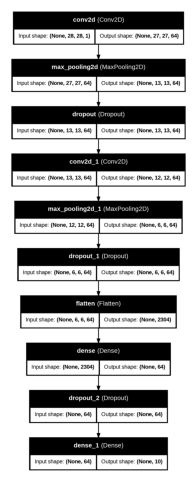

In [2]:
plot_model(model, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)


img = Image.open("cnn_model.png")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:


model.save('cnn_model_mnist.h5')

history_dict = history.history
with open("training_history_mnist.json", "w") as f:
    json.dump(history_dict, f)

# Convert the classification report string to a dictionary
report_dict = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("classification_report_mnist.csv", index=True)

with open("model_info_mnist.txt", "w") as f:
    f.write(f"training time: {training_time:.2f} s\n")
    f.write(f"accuracy on test: {test_acc:.4f}\n")

D:\software\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
